# Cumulative Returns and Drawdowns

# 0. Libraries

In [1]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# 1. Logarithmic Returns and Cumulative returns

#### Explanation of Logarithmic Returns Calculation

The Python code snippet is designed to download historical closing prices for Apple Inc. (AAPL) stock using the `yfinance` library, convert them into a pandas DataFrame, and then calculate the daily logarithmic returns. Let's dissect the specific part of the code `np.log(apple.div(apple.shift(1)))` to understand both the Python operations and the underlying mathematics.

##### Python Operations

1. **`apple.shift(1)`**: Shifts the `apple` DataFrame down by one row. For each row in the `Close` column, it fetches the previous day's closing price, making the first row `NaN` because there's no previous row.

2. **`apple.div(apple.shift(1))`**: Divides the `Close` column of the `apple` DataFrame by its shifted version row-wise, calculating the **ratio** of each day's closing price to the previous day's. This operation computes the **day-over-day price factor**.

3. **`np.log(...)`**: Applies the natural logarithm (base `e`) to the division's result, converting the price **ratios** into logarithmic returns.

##### Mathematical Explanation

The formula for calculating the daily logarithmic return is:

$[ \text{logarithmic return} = \ln\left(\frac{P_t}{P_{t-1}}\right) ]$

Where:
- $( \ln )$ is the natural logarithm,
- $( P_t )$ is the closing price on day $( t )$,
- $( P_{t-1} )$ is the closing price on the previous day ($ t-1 $).

##### Why Logarithmic Returns?

Logarithmic returns are preferred in finance for several reasons:
- **Additivity**: Log returns can be added to find the total log return over a period, unlike simple returns.
- **Negative Prices Handling**: Log returns cannot be calculated for negative or zero prices, addressing drastic price drops or data issues.
- **Small Changes Approximation**: For minor price changes, logarithmic returns approximately equal the simple percentage change, offering analytical convenience.

##### Practical Implication

Calculating logarithmic returns provides a standardized measure of stock price percentage change over time, suitable for financial analyses such as stock performance assessment, risk management, and portfolio optimization. By adding these calculated returns to the `daily_return` column of the `apple` DataFrame, the dataset is enriched with valuable information for further financial analysis or modeling.



In [2]:
apple = yf.download("AAPL")
apple = apple['Close'].to_frame()
apple

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2024-02-05,187.679993
2024-02-06,189.300003
2024-02-07,189.410004


In [3]:
# this is the daily logarithmic return
apple['daily_return'] = np.log(apple.div(apple.shift(1)))
apple

,Close,daily_return
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
...,...,...
2024-02-05,187.679993,0.009798
2024-02-06,189.300003,0.008595
2024-02-07,189.410004,0.000581


In [4]:
# now, this is the sum of the daily logarithmic return
apple['daily_return'].sum()

7.293963090997612

In [6]:
# now lets calculate what we would have if we invested 1 dollars in apple from the beginning until now 
np.exp( apple['daily_return'].sum() )
# see chapter 2 for the explanation of the np.exp function

1471.3904116523288

In [7]:
# now for the cumulative return
apple['cumreturns_1_dollar'] = apple['daily_return'].cumsum().apply(np.exp)
apple

# for cumreturns_1_dollar, the first value is 1 + the daily return since we've put in 1 dollar in the stock
# then the next value is the previous value * (1 + daily return of next day) e.g. 0.947829 * (1 + -0.076231)

,Close,daily_return,cumreturns_1_dollar
Date,,,
1980-12-12,0.128348,NaN,NaN
1980-12-15,0.121652,-0.053581,0.947829
1980-12-16,0.112723,-0.076231,0.878261
1980-12-17,0.115513,0.024450,0.899998
1980-12-18,0.118862,0.028580,0.926092
...,...,...,...
2024-02-05,187.679993,0.009798,1462.274465
2024-02-06,189.300003,0.008595,1474.896481
2024-02-07,189.410004,0.000581,1475.753531


<Axes: xlabel='Date'>

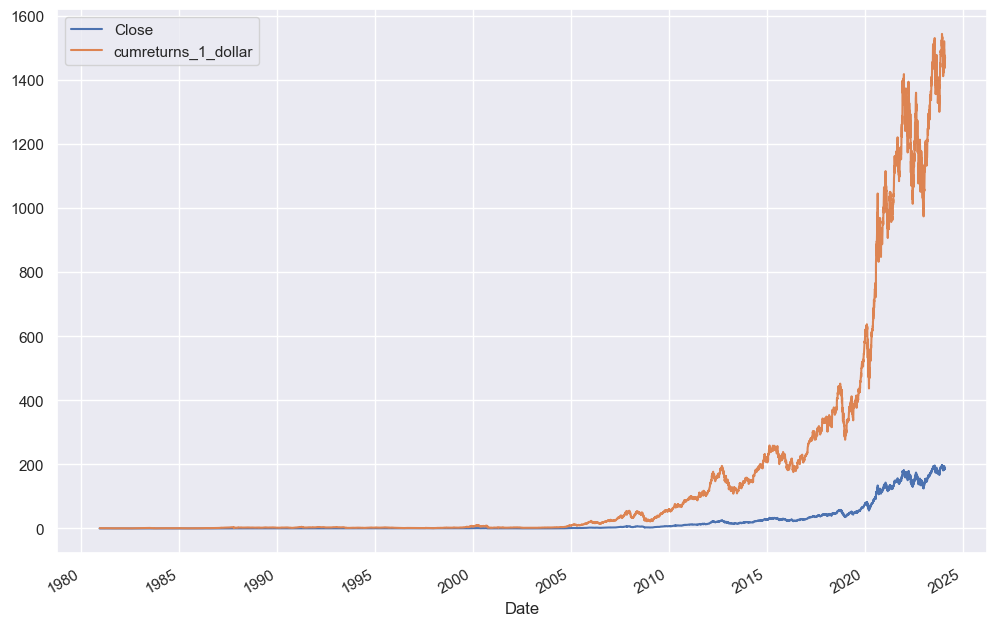

In [8]:
apple[['Close', 'cumreturns_1_dollar']].plot(figsize=(12,8))

In [9]:
# This is the cumulative return of the stock over time if we had invested 1000 dollars in it
# Initial investment
initial_investment = 1000
# Calculate the current value of the initial investment
apple['investment_value_1000_dollar'] = initial_investment * apple['cumreturns_1_dollar']
apple

,Close,daily_return,cumreturns_1_dollar,investment_value_1000_dollar
Date,,,,
1980-12-12,0.128348,NaN,NaN,NaN
1980-12-15,0.121652,-0.053581,0.947829,9.478294e+02
1980-12-16,0.112723,-0.076231,0.878261,8.782607e+02
1980-12-17,0.115513,0.024450,0.899998,8.999985e+02
1980-12-18,0.118862,0.028580,0.926092,9.260916e+02
...,...,...,...,...
2024-02-05,187.679993,0.009798,1462.274465,1.462274e+06
2024-02-06,189.300003,0.008595,1474.896481,1.474896e+06
2024-02-07,189.410004,0.000581,1475.753531,1.475754e+06


<Axes: xlabel='Date'>

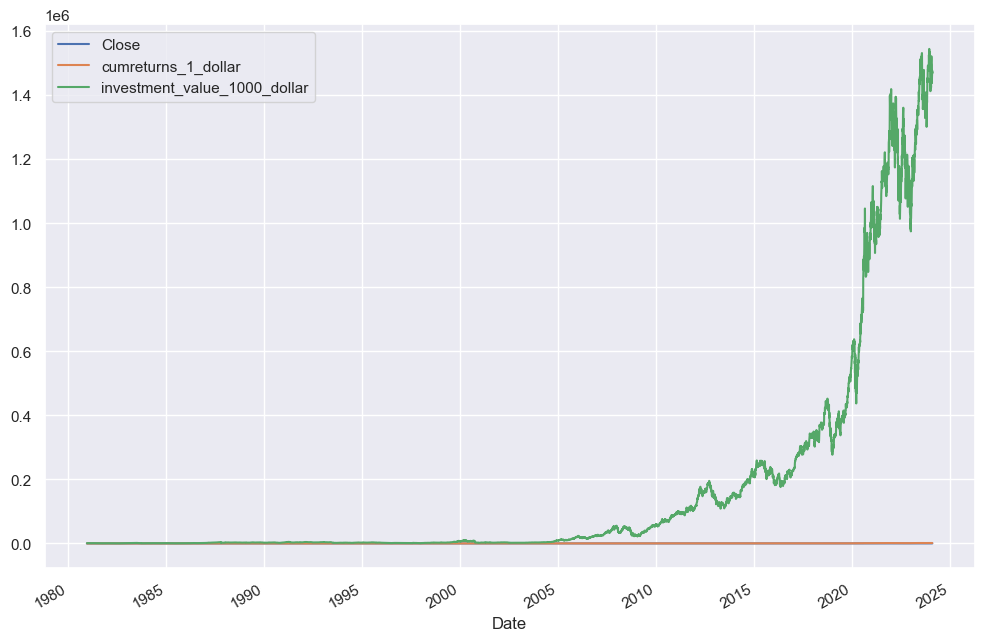

In [10]:
apple[['Close', 'cumreturns_1_dollar', 'investment_value_1000_dollar']].plot(figsize=(12,8))

In [11]:
# Annual mean return and annual standard deviation
# annual average return

print("annual mean return", apple['daily_return'].mean() * 252)
print("annual standard deviation", apple['daily_return'].std() * np.sqrt(252))

annual mean return 0.16894105688707706
annual standard deviation 0.45111827404653193


# 2. Drawdown

### Understanding Drawdowns

A drawdown is a financial term that describes the decline from a peak to a trough in the value of an investment or a trading account, before a new peak is attained. 

**The drawdown is typically expressed as the percentage difference between the peak and the subsequent trough**. Drawdowns are crucial for measuring the risk associated with an investment portfolio, a specific asset, or an investment strategy.

#### Key Points about Drawdowns:

- **Measure of Risk**: Drawdowns serve as a risk metric that helps investors assess the volatility and potential loss linked to an investment strategy. The larger the maximum drawdown, the higher the risk assumed.

- **Temporary vs. Permanent Loss**: Drawdowns indicate temporary declines in asset value, not necessarily permanent losses, assuming the asset's value eventually recovers.

- **Maximum Drawdown (Max DD)**: The largest percentage drop from peak to trough before a new peak is achieved, which is vital for evaluating the worst-case scenario for an investment strategy over a given time frame.

- **Drawdown Duration**: This refers to the period an investment or account remains in a drawdown, from the start of the decline from a peak to the recovery back to that peak. It provides insights into the time needed for recovery after a loss.

#### Calculating Drawdown

To calculate a drawdown in a time series of asset values:

1. Identify the peak (highest point) before a decline.
2. Identify the trough (lowest point) following that peak before a new peak is reached.
3. The drawdown is calculated as the percentage decrease from the peak to the trough using the formula:

$$ \text{Drawdown} = \left( \frac{\text{Peak Value} - \text{Trough Value}}{\text{Peak Value}} \right) \times 100\% $$

#### Example

Consider an investment portfolio that reaches a peak value of \$1,000 and then declines to \$800 before increasing in value again. The drawdown would be:

$$ \text{Drawdown} = \left( \frac{1000 - 800}{1000} \right) \times 100\% = 20\% $$

This calculation shows that the portfolio experienced a 20% drawdown from its peak value (the value of the investment fell 25% from its highest point before it began to rise again).

#### Importance of Understanding Drawdowns

Understanding drawdowns is vital for managing your investments because it gives you a sense of how much value your investment might lose during bad times and how that aligns with your risk tolerance and investment goals. If a 25% drop in your investment's value makes you uncomfortable, you might seek investments with lower historical drawdowns, indicating less risk and volatility.

Grasping the concept of drawdowns is essential for investors and traders as it aids in risk management and sets realistic expectations about potential losses. By analyzing drawdowns, investors can make more informed decisions that align with their risk tolerance, investment horizon, and financial goals, ensuring that they choose investment strategies that match their comfort with risk.



## 1.1 Example 1

In [12]:
# now calculating the drawdown here will require us to first calculate the cumulative max of the investment value

apple['cummax_1_dollar'] = apple['cumreturns_1_dollar'].cummax() # this searches for the max value and then keeps it until a new max is found
apple



,Close,daily_return,cumreturns_1_dollar,investment_value_1000_dollar,cummax_1_dollar
Date,,,,,
1980-12-12,0.128348,NaN,NaN,NaN,NaN
1980-12-15,0.121652,-0.053581,0.947829,9.478294e+02,0.947829
1980-12-16,0.112723,-0.076231,0.878261,8.782607e+02,0.947829
1980-12-17,0.115513,0.024450,0.899998,8.999985e+02,0.947829
1980-12-18,0.118862,0.028580,0.926092,9.260916e+02,0.947829
...,...,...,...,...,...
2024-02-05,187.679993,0.009798,1462.274465,1.462274e+06,1543.537972
2024-02-06,189.300003,0.008595,1474.896481,1.474896e+06,1543.537972
2024-02-07,189.410004,0.000581,1475.753531,1.475754e+06,1543.537972


<Axes: xlabel='Date'>

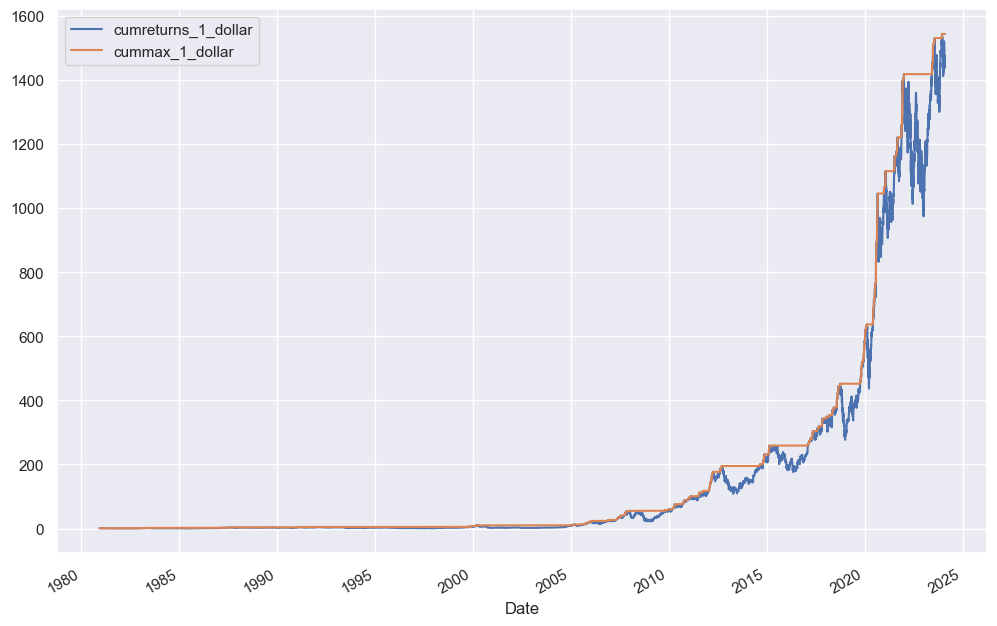

In [14]:
apple[['cumreturns_1_dollar', 'cummax_1_dollar']].plot(figsize=(12,8))
# the cummax_1_dollar is the maximum value of the investment over time

In [42]:
# for the drawdown, we will calculate the percentage difference between the cumreturns_1_dollar and the cummax_1_dollar


In [41]:
# first we calculate the drawdown
apple['drawdown'] = apple['cummax_1_dollar'] - apple['cumreturns_1_dollar']
apple['drawdown']

Date
1980-12-12          NaN
1980-12-15     0.000000
1980-12-16     0.069569
1980-12-17     0.047831
1980-12-18     0.021738
                ...    
2024-02-05    81.263506
2024-02-06    68.641491
2024-02-07    67.784441
2024-02-08    76.276949
2024-02-09    72.147560
Name: drawdown, Length: 10881, dtype: float64

In [19]:
apple['drawdown'].max() # this is the maximum amount of dollars its drop in the investment value

444.02718404402015

In [20]:
# when did this drawdown happen
apple['drawdown'].idxmax()

Timestamp('2023-01-05 00:00:00')

In [22]:
apple.loc[apple.index <= '2023-01-05 00:00:00']
# we see that the stock price was at its highest on the 5th of January 2023

,Close,daily_return,cumreturns_1_dollar,investment_value_1000_dollar,cummax_1_dollar,drawdown
Date,,,,,,
1980-12-12,0.128348,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.121652,-0.053581,0.947829,9.478294e+02,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,8.782607e+02,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,8.999985e+02,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,9.260916e+02,0.947829,0.021738
...,...,...,...,...,...,...
2022-12-29,129.610001,0.027931,1009.832703,1.009833e+06,1418.097708,408.265004
2022-12-30,129.929993,0.002466,1012.325863,1.012326e+06,1418.097708,405.771845
2023-01-03,125.070000,-0.038122,974.460113,9.744601e+05,1418.097708,443.637594


In [24]:
# percentage drawdown
# remember that: apple['drawdown'] = apple['cummax_1_dollar'] - apple['cumreturns_1_dollar']

apple['drawdown_pct'] = apple['drawdown'] / apple['cummax_1_dollar']
apple

,Close,daily_return,cumreturns_1_dollar,investment_value_1000_dollar,cummax_1_dollar,drawdown,drawdown_pct
Date,,,,,,,
1980-12-12,0.128348,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.121652,-0.053581,0.947829,9.478294e+02,0.947829,0.000000,0.000000
1980-12-16,0.112723,-0.076231,0.878261,8.782607e+02,0.947829,0.069569,0.073398
1980-12-17,0.115513,0.024450,0.899998,8.999985e+02,0.947829,0.047831,0.050464
1980-12-18,0.118862,0.028580,0.926092,9.260916e+02,0.947829,0.021738,0.022934
...,...,...,...,...,...,...,...
2024-02-05,187.679993,0.009798,1462.274465,1.462274e+06,1543.537972,81.263506,0.052648
2024-02-06,189.300003,0.008595,1474.896481,1.474896e+06,1543.537972,68.641491,0.044470
2024-02-07,189.410004,0.000581,1475.753531,1.475754e+06,1543.537972,67.784441,0.043915


In [25]:
apple['drawdown_pct'].max() # this is the maximum percentage drawdown which means its hte highest percentage loss of the investment value

0.82216567924191

In [28]:
# lets see when this happened
apple['drawdown_pct'].idxmax()

Timestamp('1997-12-23 00:00:00')

In [30]:
apple.loc[apple.index <= '1997-12-23 00:00:00']

,Close,daily_return,cumreturns_1_dollar,investment_value_1000_dollar,cummax_1_dollar,drawdown,drawdown_pct
Date,,,,,,,
1980-12-12,0.128348,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.121652,-0.053581,0.947829,947.829389,0.947829,0.000000,0.000000
1980-12-16,0.112723,-0.076231,0.878261,878.260718,0.947829,0.069569,0.073398
1980-12-17,0.115513,0.024450,0.899998,899.998467,0.947829,0.047831,0.050464
1980-12-18,0.118862,0.028580,0.926092,926.091639,0.947829,0.021738,0.022934
...,...,...,...,...,...,...,...
1997-12-17,0.124442,-0.026549,0.969567,969.567197,5.060882,4.091315,0.808419
1997-12-18,0.123326,-0.009008,0.960872,960.872085,5.060882,4.100010,0.810137
1997-12-19,0.122210,-0.009090,0.952177,952.176974,5.060882,4.108705,0.811856


In [ ]:
# standard deviation is how far does the value stray from the mean (which is the typical value of the stock)
# drawdown is the percentage loss of the investment value from the maximum value of the investment (how far has the stock collapsed from its maximum value)

## 1.2 Example 2

In [34]:
# Generate a sample DataFrame with random daily returns for 100 days
np.random.seed(42) # For reproducibility

dates = pd.date_range(start = "2021-01-01", periods = 100)

daily_returns = np.random.normal(loc = 0.001, scale = 0.02, size = 100) # loc is the mean (0.1%) and scale is the standard deviation (2%)

# Create a DataFrame with the returns and the dates

df = pd.DataFrame(data={"Date": dates, "Daily Returns": daily_returns})
df.set_index
df

,Date,Daily Returns
0,2021-01-01,0.010934
1,2021-01-02,-0.001765
2,2021-01-03,0.013954
3,2021-01-04,0.031461
4,2021-01-05,-0.003683
...,...,...
95,2021-04-06,-0.028270
96,2021-04-07,0.006922
97,2021-04-08,0.006221
98,2021-04-09,0.001102


In [37]:
# We'll calculate the cumulative return, which gives us the total return on the investment over time, assuming we reinvest the returns daily.
df['Cumulative Return'] = (1 + df['Daily Returns']).cumprod()
df


,Date,Daily Returns,Cumulative Return
0,2021-01-01,0.010934,1.010934
1,2021-01-02,-0.001765,1.009150
2,2021-01-03,0.013954,1.023231
3,2021-01-04,0.031461,1.055423
4,2021-01-05,-0.003683,1.051535


In [ ]:
# Now, we'll calculate drawdowns, which involve finding the peak (highest point) of the cumulative return up to each date 
# and then calculating how much the value has dropped from this peak


In [38]:

# Calculate the maximum cumulative return up to each point
df['Cumulative Max'] = df['Cumulative Return'].cummax()
df


,Date,Daily Returns,Cumulative Return,Cumulative Max
0,2021-01-01,0.010934,1.010934,1.010934
1,2021-01-02,-0.001765,1.009150,1.010934
2,2021-01-03,0.013954,1.023231,1.023231
3,2021-01-04,0.031461,1.055423,1.055423
4,2021-01-05,-0.003683,1.051535,1.055423
...,...,...,...,...
95,2021-04-06,-0.028270,0.874011,1.103183
96,2021-04-07,0.006922,0.880061,1.103183
97,2021-04-08,0.006221,0.885536,1.103183
98,2021-04-09,0.001102,0.886512,1.103183


In [39]:

# Calculate drawdown
df['Drawdown'] = (df['Cumulative Return'] - df['Cumulative Max']) / df['Cumulative Max']

df


,Date,Daily Returns,Cumulative Return,Cumulative Max,Drawdown
0,2021-01-01,0.010934,1.010934,1.010934,0.000000
1,2021-01-02,-0.001765,1.009150,1.010934,-0.001765
2,2021-01-03,0.013954,1.023231,1.023231,0.000000
3,2021-01-04,0.031461,1.055423,1.055423,0.000000
4,2021-01-05,-0.003683,1.051535,1.055423,-0.003683
...,...,...,...,...,...
95,2021-04-06,-0.028270,0.874011,1.103183,-0.207737
96,2021-04-07,0.006922,0.880061,1.103183,-0.202253
97,2021-04-08,0.006221,0.885536,1.103183,-0.197290
98,2021-04-09,0.001102,0.886512,1.103183,-0.196405


In [40]:
# Finally, we'll find the maximum drawdown, which is the largest drop from peak to trough over the entire period.
max_drawdown = df['Drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")



Maximum Drawdown: -25.51%
